In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Morris_Lecar:
    def __init__(self) -> None:
        self.V1 = -1.2
        self.V2 = 18
        self.V3 = 12
        self.V4 = 17.4
        self.phi = 0.04
        self.gCa = 4.4
        self.gK = 8
        self.gL = 2
        self.VCa = 120
        self.VK = -84
        self.VL = -60
        self.I_ext = 40

    def m_inf(self, V):
        return 0.5 * (1 + np.tanh((V - self.V1) / self.V2))
    
    def w_inf(self, V):
        return 0.5 * (1 + np.tanh((V - self.V3) / self.V4))

    def tau_w(self, V):
        return 1 / (self.phi * np.cosh((V - self.V3) / (2 * self.V4)))
    

In [3]:
class Simulation:
    def __init__(self) -> None:
        # Time Parameters
        self.dt = 0.01
        self.T = 200
        self.time = np.arange(0, self.T, self.dt)

        # Initial conditions
        self.V = np.zeros(len(self.time))
        self.W = np.zeros(len(self.time))
        self.V[0] = -60
        self.W[0] = 0.014

        self.model = Morris_Lecar()

    # def __init__(self, dt, T, time, V, W, v, w) -> None:
    #     self.dt = dt
    #     self.T = T
    #     self.time = time

    #     # Initial conditions
    #     self.V = V
    #     self.W = W
    #     self.V[0] = v
    #     self.W[0] = w

    #     self.model = Morris_Lecar()
    
    def loop(self):
        for self.t in range(1, len(self.time)):
            m = self.model.m_inf(self.V[self.t-1])
            w = self.W[self.t-1]
            dV = (self.model.I_ext - self.model.gCa * m * (self.V[self.t-1] - self.model.VCa) - 
                  self.model.gK * w * (self.V[self.t-1] - self.model.VK) - self.model.gL * (self.V[self.t-1] - self.model.VL)) * self.dt
            dW = (self.model.w_inf(self.V[self.t-1]) - w) / self.model.tau_w(self.V[self.t-1]) * self.dt
            self.V[self.t] = self.V[self.t-1] + dV
            self.W[self.t] = self.W[self.t-1] + dW

        # Plotting the results
        plt.figure(figsize=(10, 5))
        plt.plot(self.time, self.V, label='Membrane potential (V)')
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane potential (mV)')
        plt.title('Morris-Lecar Model')
        plt.legend()
        plt.show()

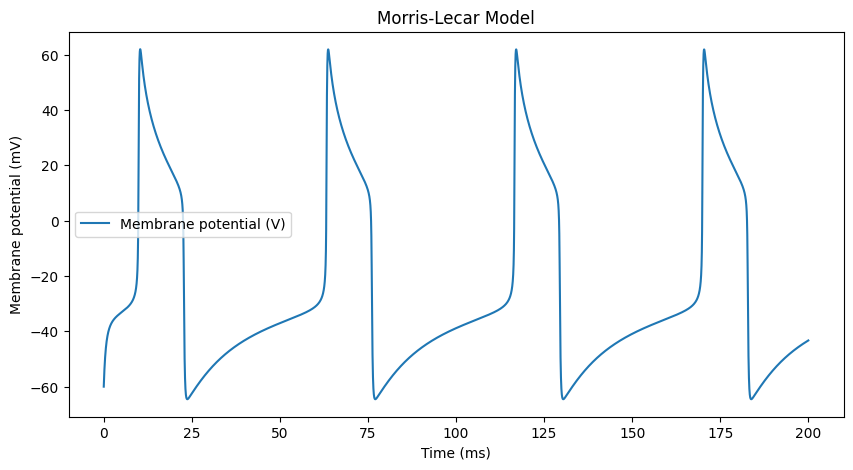

In [4]:
Simulation().loop()